# Exploratory Data Analysis of Roller Coaster Dataset

This notebook provides a step-by-step exploratory data analysis (EDA) of a roller coaster dataset. The goal is to understand the data, clean it, and visualize it to uncover insights.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

Matplotlib is building the font cache; this may take a moment.


## 2. Data Loading and Inspection

In [2]:
# Load the Dataset
coaster_df = pd.read_csv('../001_Data_Analysis/Data/coaster_db.csv')

### Inspecting the Data
Let's start by getting a feel for the dataset. We'll look at its shape, the first few rows, column names, data types, and summary statistics.

In [3]:
print(coaster_df.shape)

(1087, 56)


In [4]:
coaster_df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [5]:
coaster_df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [6]:
coaster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

In [7]:
coaster_df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


## 3. Data Cleaning and Preparation

### Selecting a Subset of Columns
The dataset has many columns, some of which are redundant or not useful for our analysis. We'll select a subset of columns to work with.

In [8]:
df = coaster_df[['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced', 
                   'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph', 
                   'height_ft', 'Inversions_clean', 'Gforce_clean']].copy()

### Data Type Conversion
We'll convert the `opening_date_clean` column to a datetime object.

In [9]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

### Renaming Columns
Let's rename the columns to be more consistent and readable.

In [10]:
df = df.rename(columns={
    'coaster_name': 'Coaster_Name',
    'year_introduced': 'Year_Introduced',
    'opening_date_clean': 'Opening_Date_Clean',
    'speed_mph': 'Speed_MPH',
    'height_ft': 'Height_FT',
    'Inversions_clean': 'Inversions_Clean',
    'Gforce_clean': 'GForce_Clean'
})

### Handling Missing Values

In [11]:
df.isna().sum()

Coaster_Name            0
Location                0
Status                213
Manufacturer           59
Year_Introduced         0
latitude              275
longitude             275
Type_Main               0
Opening_Date_Clean    250
Speed_MPH             150
Height_FT             916
Inversions_Clean        0
GForce_Clean          725
dtype: int64

The `Height_FT` and `GForce_Clean` columns have a significant number of missing values. For this analysis, we will fill the missing `Height_FT` values with the median height. We will drop the `GForce_Clean` column for now as it has too many missing values to be reliably imputed.

In [12]:
df['Height_FT'] = df['Height_FT'].fillna(df['Height_FT'].median())
df = df.drop(columns=['GForce_Clean'])

### Handling Duplicates

In [13]:
df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date_Clean']).sum()

np.int64(97)

In [14]:
# Remove duplicate rows
df = df.loc[~df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date_Clean'])].reset_index(drop=True).copy()

## 4. Feature Engineering

Let's create a new feature for the age of the roller coaster.

In [15]:
df['Age'] = pd.to_datetime('today').year - df['Year_Introduced']

## 5. Exploratory Data Analysis & Visualization

### Univariate Analysis

Univariate analysis is just a fancy way of saying we're looking at one variable at a time. We'll check out things like the distribution of speeds, the most common years for new coasters, and which manufacturers have built the most rides. It's all about understanding each feature on its own.

<Axes: title={'center': 'Top 10 Years for Roller Coaster Introductions'}, xlabel='Year_Introduced'>

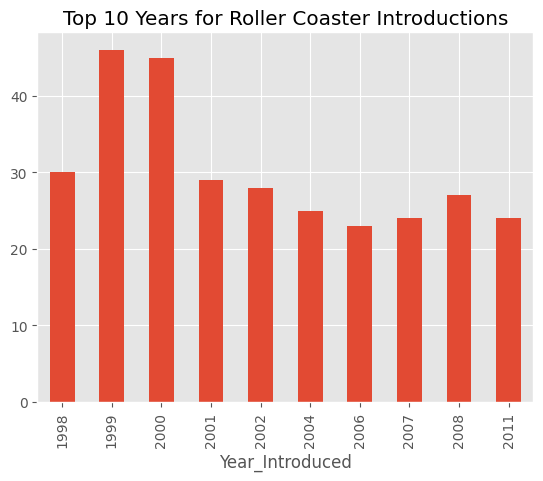

In [16]:
df['Year_Introduced'].value_counts().head(10).sort_index().plot(kind='bar', title='Top 10 Years for Roller Coaster Introductions')

Text(0.5, 1.0, 'Distribution of Roller Coaster Speeds')

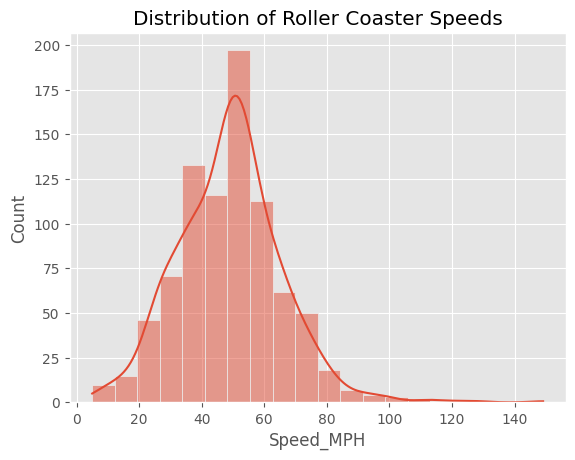

In [17]:
sns.histplot(df['Speed_MPH'].dropna(), bins=20, kde=True).set_title('Distribution of Roller Coaster Speeds')

<Axes: title={'center': 'Top 10 Roller Coaster Manufacturers'}, ylabel='Manufacturer'>

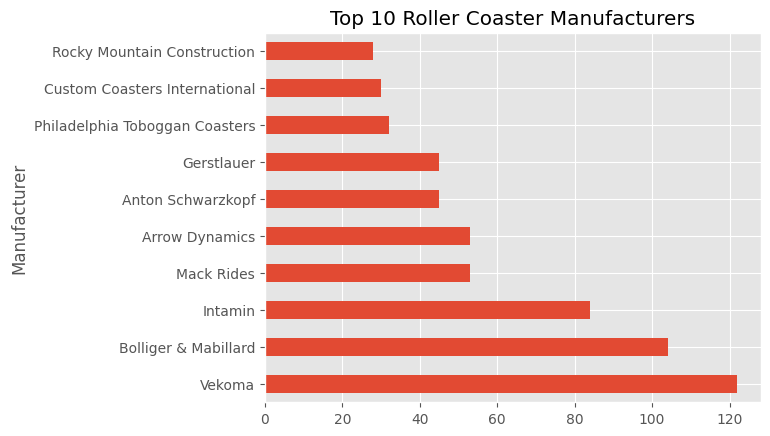

In [18]:
df['Manufacturer'].value_counts().head(10).plot(kind='barh', title='Top 10 Roller Coaster Manufacturers')

### Bivariate and Multivariate Analysis

Now things get a bit more interesting! Bivariate and multivariate analysis means we're looking at how two or more variables relate to each other. For example, we'll see if there's a connection between a coaster's height and its speed. This is where we can start to find some cool patterns and relationships in the data.

Text(0.5, 1.0, 'Coaster Speed vs. Height')

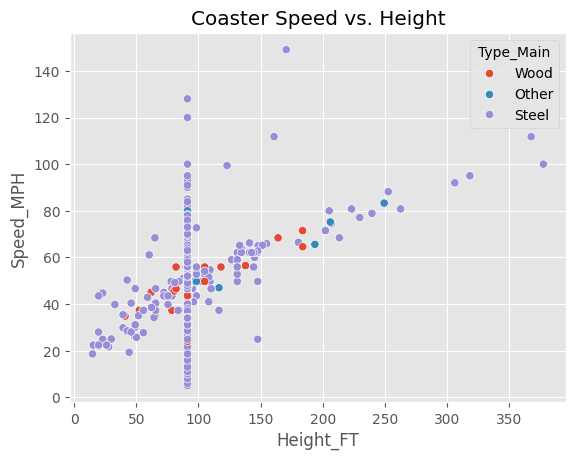

In [19]:
sns.scatterplot(data=df, x='Height_FT', y='Speed_MPH', hue='Type_Main').set_title('Coaster Speed vs. Height')

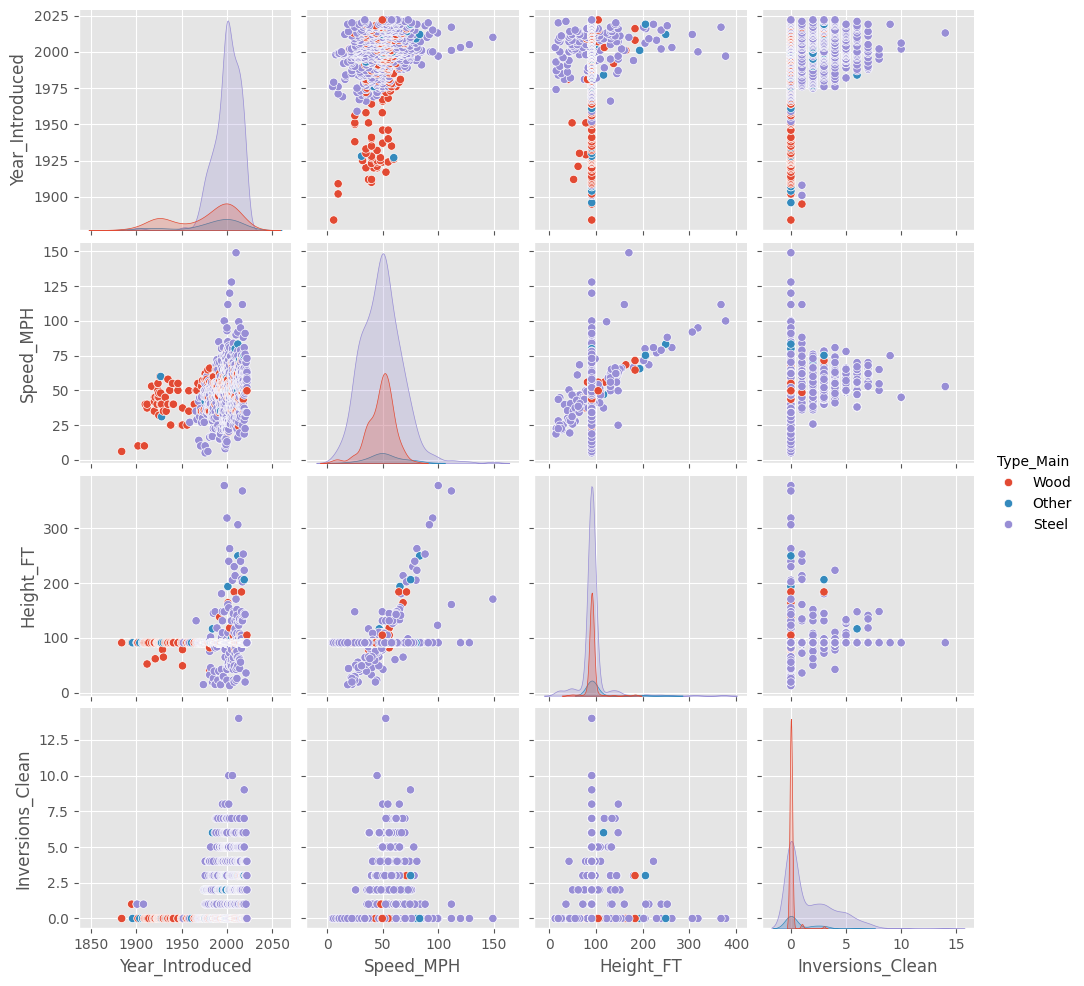

In [20]:
sns.pairplot(df, vars=['Year_Introduced', 'Speed_MPH', 'Height_FT', 'Inversions_Clean'], hue='Type_Main')

<Axes: >

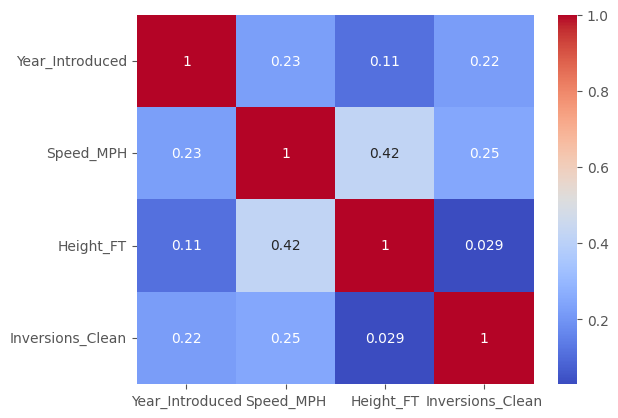

In [21]:
df_corr = df[['Year_Introduced', 'Speed_MPH', 'Height_FT', 'Inversions_Clean']].dropna().corr()
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

### Answering a Question: What are the locations with the fastest Roller Coasters?

<Axes: title={'center': 'Average Roller Coaster Speed by Location'}, ylabel='Location'>

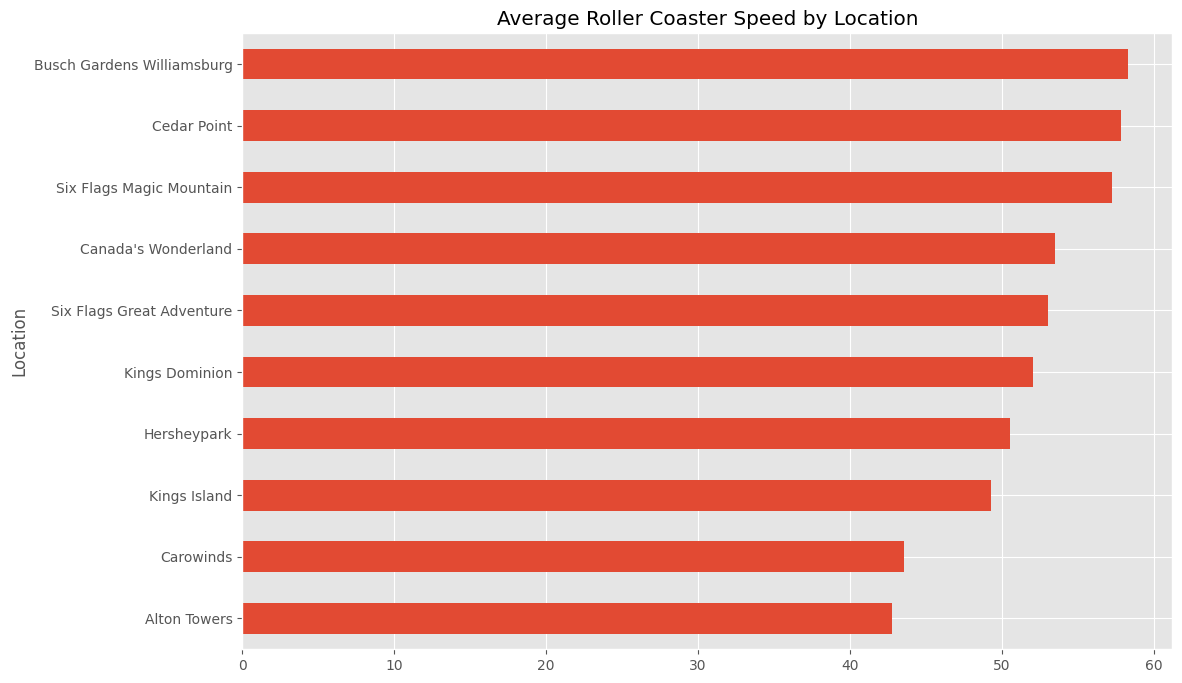

In [22]:
df.query('Location != "Other"').groupby('Location')['Speed_MPH'].agg(['mean', 'count']).query('count >= 10').sort_values('mean')['mean'].plot(kind='barh', figsize=(12, 8), title='Average Roller Coaster Speed by Location')

## 6. Conclusion

This exploratory data analysis revealed several key insights about the roller coaster dataset:

- The number of new roller coasters introduced peaked in the late 1990s and early 2000s.
- There is a strong positive correlation between a roller coaster's height and its speed.
- Vekoma and Bolliger & Mabillard are among the most prolific roller coaster manufacturers.
- Cedar Point and Six Flags parks are home to some of the fastest roller coasters.

Further analysis could involve building a predictive model to estimate a roller coaster's speed based on its other features.